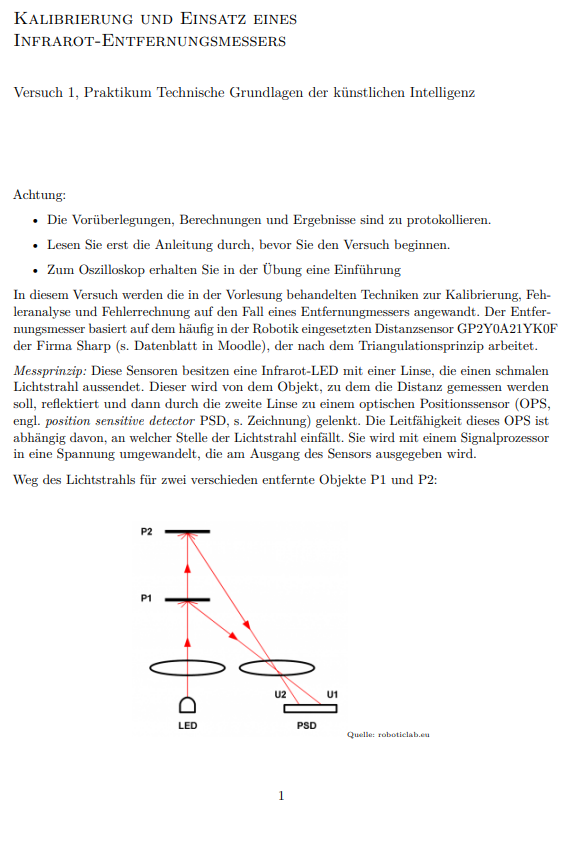

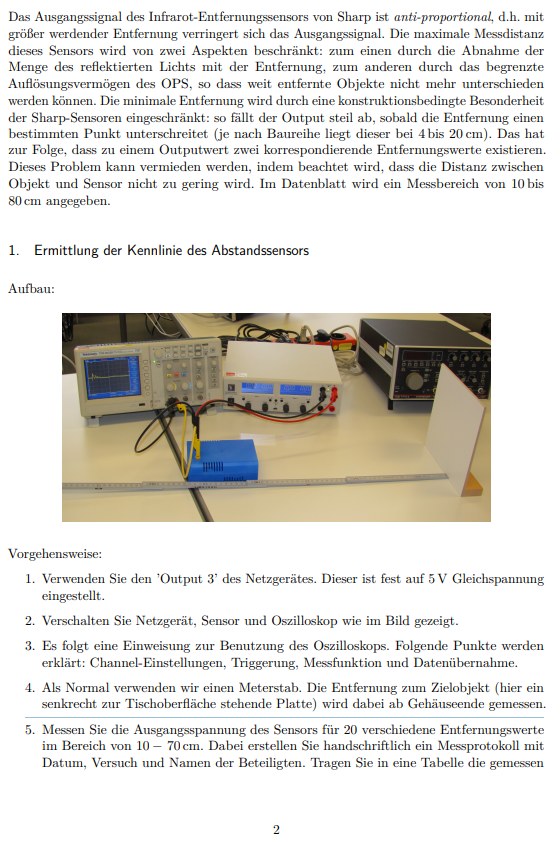

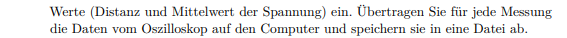

__Messprotokoll__

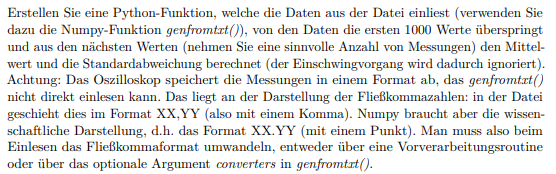

In [73]:
import numpy as np              #Standardbibliothek für mathematische Berechnungen mit Arrays und Matrizen
#np.array([...])	erstellt ein numerisches Array
#np.linspace(a, b, n)	erzeugt n gleichmäßig verteilte Werte zwischen a und b
#np.exp(x)	berechnet e hoch x (Exponentialfunktion)
#np.log(x)	berechnet den natürlichen Logarithmus
#np.mean(x)	Mittelwert
#np.std(x)	Standardabweichung

import matplotlib.pyplot as plt #Plots, Achsen, Linien, Punkte, Legenden usw.
#plt.plot(x, y)	Zeichnet eine Linie
#plt.scatter(x, y)	Zeichnet Punkte
#plt.xlabel("Text")	Beschriftet die x-Achse
#plt.ylabel("Text")	Beschriftet die y-Achse
#plt.title("Titel")	Fügt dem Plot einen Titel hinzu
#plt.legend()	Zeigt die Legende an
#plt.grid(True)	Gitterlinien einblenden
#plt.show()	Zeigt den Plot im Fenster an
#plt.figure(figsize=(8,4))	Erstellt ein neues Plotfenster mit bestimmter Größe

#plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
#dass alles schön sichtbar bleibt

In [74]:
#Konverter für Dezimalzahlen, bei denen das Trennzeichen ein Komma ist
def conv(x):
    return float(x.replace(',', '.'))

def rechne():           liest die Messdateien ein, bestimmt Standartabweichung, Spannungsmitttelwert, 
                        und gibt alle Spannungen u, alle zeiten t und die berechneten Werte zurück

delimiter=','	        Spalten sind durch Komma getrennt

skip_header=1000	    erste 1000 Zeilen (z. B. Spaltennamen) werden übersprungen

autostrip=True          entfernt Leerzeichen um Werte herum

max_rows                Liest nur n Zeilen nach skip_header ein

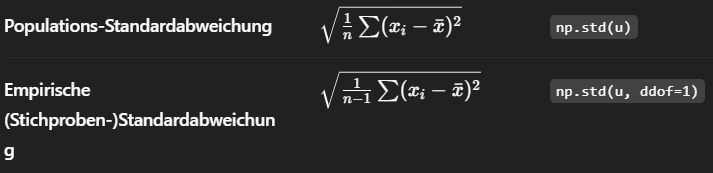

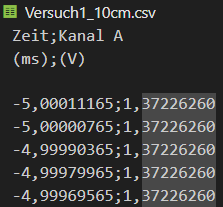

In [75]:
def rechne(messungsDateiPath):
    # CSV einlesen (überspringe Header)
    # data = np.array()
    data = np.genfromtxt(
        messungsDateiPath,              # Path zur Datei (Endung .csv)
        delimiter=';',                  # Zeilen Getrennt durch Semikolon
        skip_header=1000,               # erste 1000 Zeilen überspringen
        converters={0: conv, 1: conv},  # Nach dem vorhin festgelegten Konverter , durch . ersetzen
                                        # In beiden Spalten
        autostrip=True,                 # entfernt Leerzeichen um Werte herum
        max_rows = 200                  # Stichprobengröße ist 200
    )
    
    # Zeit und Spannung extrahieren (t und u sind np arrays)
    t = np.abs(data[:, 0])      # erste Spalte: Zeit
    u = data[:, 1]              # zweite Spalte: Spannung
    
    # Mittelwert 
    spannungMittelwert = np.mean(u)  #sum(u)/len(u)
    
    # Standardabweichung
    standardAbweichungU = np.std(u)
    
    # Empirische Standardabweichung
    emstandardAbweichungU  = np.std(u, ddof=1)      # ddof=1 → delta degrees of freedom = 1
                                                    # ddof=1 bedeutet: teile durch n-1 => emp std
    return t, u, spannungMittelwert, standardAbweichungU, emstandardAbweichungU

Plott Csv plottet den originalen Spannungsgrafen für die übergebenen Rückgabewerte von rechne().
über den Parameter spezifizierung kann man eine Überschrift für den Plott mitgeben

In [76]:
def plottCsv(spezifizierung, t, u, spannungMittelwert, standardAbweichungU, emstandardAbweichungU):
        # daten plotten
    plt.figure(figsize=(8,4))
    #plott
    
    plt.plot(t, u, label='Signal', color='blue')
    # Mittelwert-Linie 
    # plt.axhline() gehört zu Matplotlib
    # und wird verwendet, um eine horizontale Linie in ein Diagramm zu zeichnen.
    plt.axhline(spannungMittelwert, 
                color='green', 
                linestyle='--', 
                label=f'mean = {spannungMittelwert:.3f} V')
    # Standardabweichungslinien
    plt.axhline(spannungMittelwert + standardAbweichungU, 
                color='red', 
                linestyle='-', 
                label=f'std +1σ = {spannungMittelwert + standardAbweichungU:.3f} V')
    plt.axhline(spannungMittelwert - standardAbweichungU, 
                color='red', 
                linestyle='-', 
                label=f'std -1σ = {spannungMittelwert - standardAbweichungU:.3f} V')
    
    # empirischeStandardabweichungslinien
    plt.axhline(spannungMittelwert + emstandardAbweichungU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd +1σ = {spannungMittelwert + emstandardAbweichungU:.3f} V')
    plt.axhline(spannungMittelwert - emstandardAbweichungU, 
                color='cyan', 
                linestyle=':', 
                label=f'emstd -1σ = {spannungMittelwert - emstandardAbweichungU:.3f} V')
    
    plt.title(f"Oszilloskop-Messung {spezifizierung}")
    #Achsenbeschriftung
    plt.xlabel("Zeit [s]")
    plt.ylabel("Spannung [V]")
    plt.grid(True)
    plt.legend(loc = 'upper right')  #legende oben rechts
    #plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
    #dass alles schön sichtbar bleibt
    plt.tight_layout()
    plt.show()
    

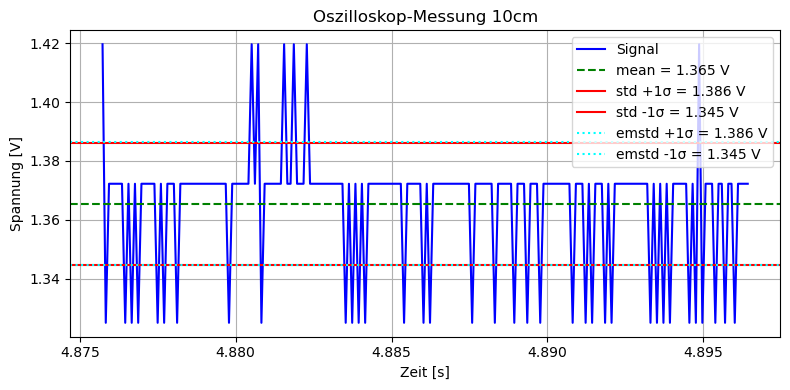

In [77]:
#Bsp. Plott 10cm
cm=10
t, u, uM, stdu, emstd= rechne(f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv")        
plottCsv("10cm", t, u,  uM, stdu, emstd)

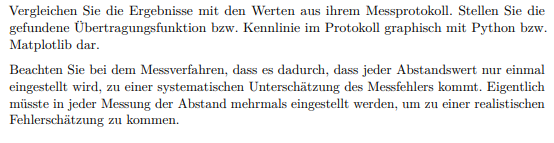

plotCMstep erhält bei Übergabe eine Plottüberschrift zur Spezifizierung und ein Array mit den handmesswerten, bzw. den Werten aus unserer handgeschriebenen Tabelle mit Spannungsmittelwerten pro cm
(keine cm in dem handmesswerte -Array, aber es ist in der richtigen Reihenfolge)

plotCMstep plottet die Übertragungsfunktion

In [78]:
def plotCMstep(spezifizierung, handmesswerte, dateipfad=""):
    plt.figure(figsize=(8,4))           #neuer Plott
    wertindex = 0
    for cm  in range(10, 71, 3):        #für jeden cm-Schritt (alle 3 cm)  
        #dynamisches Aufrufen der rechne(Methode) durch Path mit austauschbaren cm-Angaben          
        if(dateipfad==""):
            t, u, uM, stdu, emstd = rechne(
                f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv"
            )
        else:
            t, u, uM, stdu, emstd = rechne(dateipfad)
            
        for j in range(len(u)):
            #Nur im ersten Durchlauf label anhängen (plott Punktwolke originalwerte)
            if(j==0 and cm==10):        
                plt.plot(cm, u[j], ".", color = "cyan", label = 'Osz-werte in V')      
            else:
                plt.plot(cm, u[j], ".", color = "cyan")  
        #Nur im ersten Durchlauf label anhängen (plott berechneter und gemessener Mittelwert)
        if (wertindex==0):
            plt.plot(cm, handmesswerte[wertindex], "o", color="magenta",label='Handmesswerte')
            plt.plot(cm, uM,".", color='black', label='Spannungsmittelwert')
            #plt.plot(cm, uM-emstd,".", color='orange', label=f"emstd -1σ: {(uM-stdu):.3f}") 
        else:    
            plt.plot(cm, handmesswerte[wertindex], "o", color="magenta")
            plt.plot(cm, uM,".", color='black')
            #plt.plot(cm, uM-emstd,".", color='orange') 
        if(wertindex<len(handmesswerte)):
            wertindex= wertindex+1



    plt.title(f"Oszilloskop-Messung {spezifizierung}")
    #Achsenbeschriftung
    plt.xlabel("Abstand [cm]")
    plt.ylabel("Spannung [V]")
    plt.grid(True)
    plt.legend(loc='upper right')   #legende oben rechts
    #plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
    #dass alles schön sichtbar bleibt
    plt.tight_layout()
    plt.show()
    

vergleiche() bekommt die handmesswerte und übergibt sie direkt mit einer spezifizierung an plotCMstep (somit eigentlich unnötig, finde ich aber verständlicher von der Bezeichnung und man muss wenn man vergleiche() öfter aufruft nicht jedes mal eine Spezifizierung angeben)

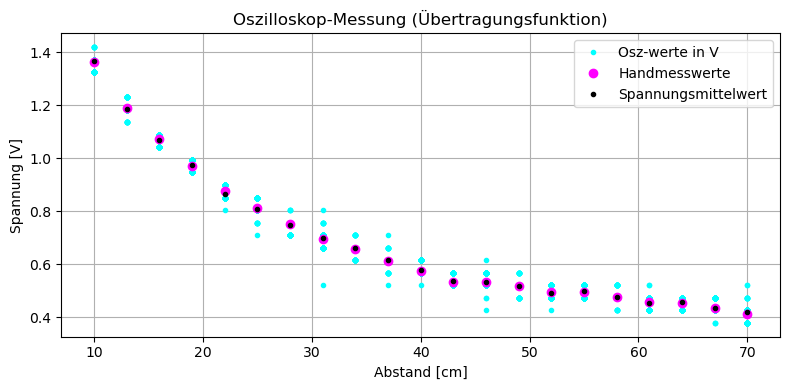

In [79]:

handmesswerte   = [1.364, 1.188, 1.071, 0.971, 0.875, 0.812, 
                   0.752, 0.696, 0.656, 0.614, 0.576, 0.533,
                   0.534, 0.518, 0.497, 0.494, 0.476, 0.458,
                   0.452, 0.433, 0.414]


def vergleiche(handmesswerte, dateipfad = ""):
    if(dateipfad!=""):
        plotCMstep("(Übertragungsfunktion)", handmesswerte, dateipfad)
    else:
        plotCMstep("(Übertragungsfunktion)", handmesswerte)
vergleiche(handmesswerte)

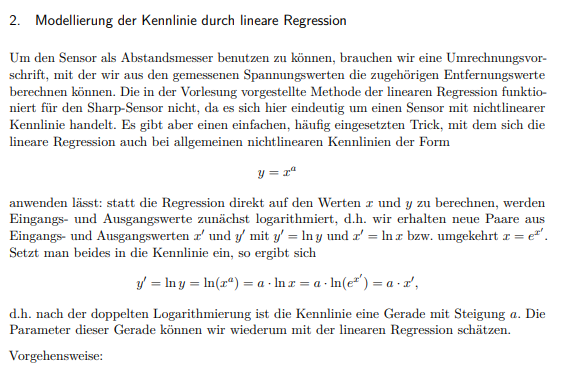

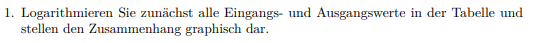

diese Aufgabe übernimmt lorarythmierAll(), es stellt alle Eingangs und Ausgangswerte logarythmiert in einer Punktwolke dar, bei bedarf kann es auch die originalpunktwolke anzeigen um das Verhältnis zu verdeutlichen

Ab dieser Funktion sind die Achsen vertauscht. cm sind auf der y-Achse und Spanungen auf der x-Achse, da x eingabe- und y ausgabewerte sind und wir auch Spannung in die Funktion geben um cm zu erhalten

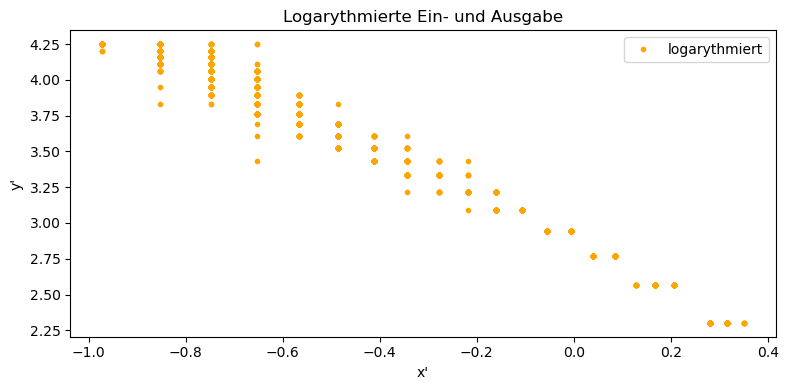

In [80]:
def logarythmierAll(dateipfad=""): 
    plt.figure(figsize=(8,4))       #neuer Plott
    for cm in range(10,71,3):       #für jeden cm-Schritt (alle 3 cm)   
        if(dateipfad==""):
            t, u, uM, stdu, emstd = rechne(
                f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv"
            )
        else:
            cm=67
            t, u, uM, stdu, emstd = rechne(dateipfad)
        for j in range(len(u)):
            xStrich=np.log(u)
            yStrich=np.log(cm)
            
            if(j==0 and cm==10):
                #optionaler originalplott
                #plt.plot(u[j] ,cm , ".", color = "black", label= 'original')
                #logarythmierter plott
                plt.plot(xStrich[j] ,yStrich , ".", color = "orange", label= 'logarythmiert')
            else:
                #optionaler originalplott
                #plt.plot(u[j] ,cm , ".", color = "black")
                #logarythmierter plott
                plt.plot(xStrich[j],yStrich, ".", color = "orange")
    
    plt.title("Logarythmierte Ein- und Ausgabe")
    plt.legend(loc = "upper right")     #legende oben rechts
    plt.ylabel("y'")
    plt.xlabel("x'")
    #plt.tight_layout() passt automatisch die Abstände zwischen Plot und Rand so an,
    #dass alles schön sichtbar bleibt
    plt.tight_layout()
    plt.show()

logarythmierAll()      

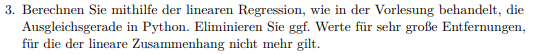

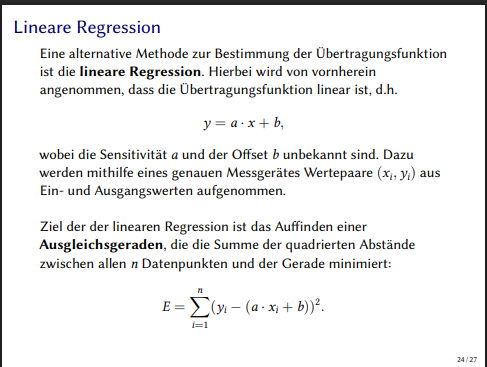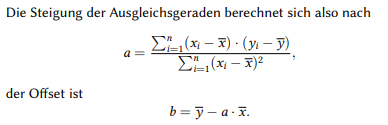

a = -1.6022, b = 2.8514
Potenzfunktion: y = e^2.8514 * x^-1.6022


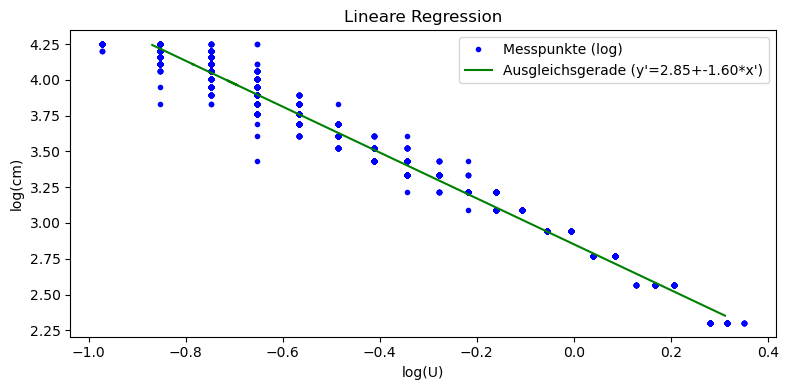

(np.float64(2.8513794573175826), np.float64(-1.602196228900212))

In [81]:
def lineareRegression(dateipfad=""):
    cmArray = np.arange(10, 71, 3)
    uM_values = []   # Liste für Spannungsmittelwerte
    x_all = []       # log(U) für alle Einzelmessungen
    y_all = []       # log(cm) für alle Einzelmessungen
       
    # Alle Mittelwerte uM sammeln
    for cm in cmArray:
        if(dateipfad=="" or "cm.csv" in dateipfad):
            pfad = f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv"
        else:
            cm=67
            pfad = dateipfad

        # Messwerte aus CSV-Datei einlesen
        t, u, uM, stdu, emstd = rechne(pfad)

        # Mittelwert speichern
        uM_values.append(uM)

        # Alle Einzelmessungen (u) als log(U) + log(cm) speichern
        x_all.extend(np.log(u))
        y_all.extend(np.full(len(u), np.log(cm)))  # gleichlanges Array für y

    # In numpy-Arrays umwandeln
    x_all = np.array(x_all)
    y_all = np.array(y_all)
    xlogUM = np.log(uM_values)
    ylog = np.log(cmArray)

    # Mittelwerte berechnen
    xM = np.mean(xlogUM)
    yM = np.mean(ylog)

    # Summen bilden
    summ_oben = np.sum((xlogUM - xM) * (ylog - yM))   # Summe über dem Bruchstrich bei der Berechnung von a
    summ_unten = np.sum((xlogUM - xM)**2)             # Summe unter dem Bruchstrich bei der Berechnung von a

    # Regression
    a = summ_oben / summ_unten              # Berechnung von a
    b = yM - a * xM                         # Berechnung von b

    # Ausgabe der Regressionsparameter
    print(f"a = {a:.4f}, b = {b:.4f}")                      
    print(f"Potenzfunktion: y = e^{b:.4f} * x^{a:.4f}")     

    # Ausgleichsgerade plotten
    geradeY = a * xlogUM + b

    plt.figure(figsize=(8,4))
    
    # Punktwolke (alle log(U) gegen log(cm))
    plt.plot(x_all, y_all, ".", color='blue', label="Messpunkte (log)")
    
    # Regressionsgerade
    plt.plot(xlogUM, geradeY, "-", label=f"Ausgleichsgerade (y'={b:.2f}+{a:.2f}*x')", color="green")
    
    # doppelte label vermeiden------------------------------------------
    # plt.getCurentAxes()
    #   Gibt die aktuelle Achse (das aktuelle Diagramm) zurück, auf der man zeichnet
    #   Rückgabe Objekt vom Typ matplotlib.axes._axes.Axes
    # .get_legend_handles_labels() liefert zwei Listen zurück: handles, labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # zip(labels, handles) verbindet beide Listen paarweise: 
    #   [("Messpunkte", obj1), ("Messpunkte", obj2), ("Kennlinie", obj3)]
    # durch dict() wird das zu einem Dictionary umgewandelt: 
    #   doppelte Schlüssel („Messpunkte“) werden automatisch überschrieben,
    #   es bleibt nur ein Eintrag pro Label übrig
    by_label = dict(zip(labels, handles))
    # plt.legend(by_label.values(), by_label.keys()) Zeigt jetzt die Legende ohne doppelte Einträge an
    #.values = Plot-Objekte
    #.keys = Textbeschriftung
    plt.legend(by_label.values(), by_label.keys())
    #---------------------------------------------------------------
    
    plt.xlabel("log(U)")
    plt.ylabel("log(cm)")
    plt.title("Lineare Regression")
    
    plt.tight_layout()
    plt.show()

    return (b, a)
lineareRegression()

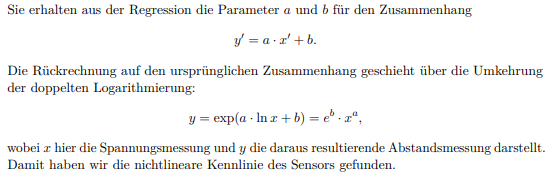

rueckrechnung() plottet sowohl die logarythmierte, als auch die auf die Originalwerte zurückgerechnete Ausglichsgerade, bzw die nichtlineare Kennlinie

a = -1.6022, b = 2.8514
Potenzfunktion: y = e^2.8514 * x^-1.6022


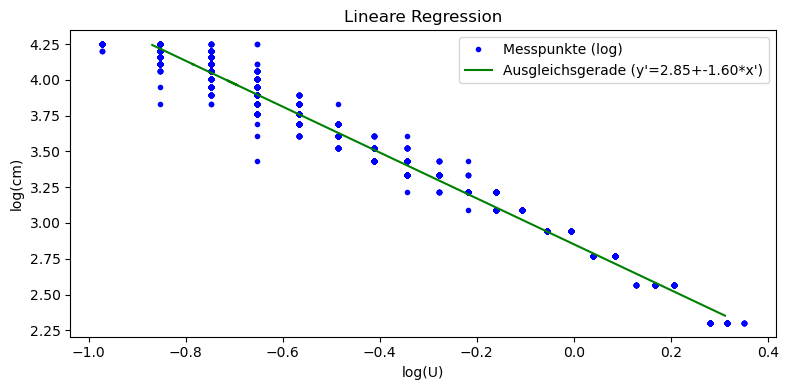

Für 0.685 Ergebnis: 40.121


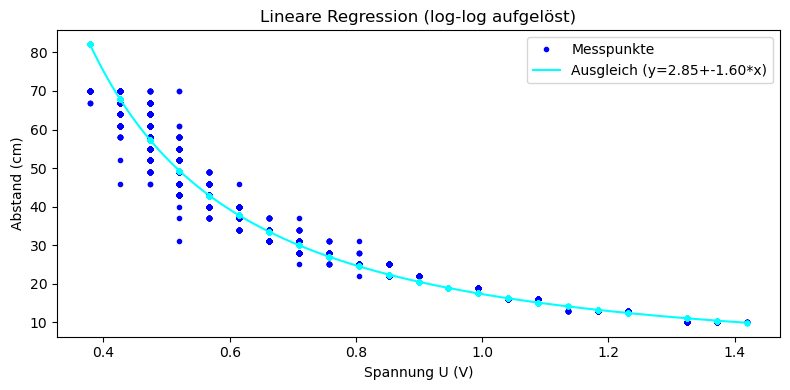

In [82]:
def rueckrechnung(dateipfad=""):
    x = 0
    x_all = []
    y_all = []
    
    # für alle cm-Schritte (alle 3 cm zwischen 10 und 70)
    for i in range(10, 71, 3):  
        cm = i
        if(dateipfad == ""):
            # falls kein Dateipfad angegeben ist → Standardpfad verwenden
            pfad = f"C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_{cm}cm.csv"
        else:
            # falls Pfad übergeben → diese Datei einlesen
            cm=67
            pfad = dateipfad
            
        # einlesen der Daten aus CSV-Datei
        t, u, uM, stdu, emstd = rechne(pfad)
        
        # alle Messwerte in Listen sammeln
        for j in range(len(u)):          
            x_all.append(u[j])      # Spannung U
            y_all.append(cm)        # Abstand cm
    
    # in numpy array umwandeln         
    x_all = np.array(x_all)
    y_all = np.array(y_all)
    
    # lineare Regression zeigt ihren Plott und gibt b und a zurück         
    b, a = lineareRegression(pfad)   # kein dateipfad → komplette Regression über alle Dateien
    
    # Umkehrung bzw Rückrechnung der doppelten Logarithmierung
    y = np.exp(b) * (x_all ** a)
    
    plt.figure(figsize=(8,4))       # neuer Plott
    
    # erstellen 300 gleichmäßiger x-Werte für einen glatten Plott (sonst zackig und teils mehrfach)
    x_fit = np.linspace(min(x_all), max(x_all), 300)    
    
    # y-Wert für all diese Werte
    y_fit = np.exp(b) * (x_fit ** a)
    sumXall =0
    sumY=0
    # Beispielausgabe einiger Rückrechnungen
    for i in range(0,len(x_all)):
        sumXall = sumXall + x_all[i]
        sumY = sumY + y[i]
    print(f"Für {sumXall/len(x_all):.3f} Ergebnis: {sumY/len(y):.3f}")
    
    # plott Messpunkte
    plt.plot(x_all, y_all, ".", color='blue', label="Messpunkte")
    
    # Ausgleichsgerade Pünktchen und gerade
    plt.plot(x_all, y, ".", label=f"Ausgleich (y={b:.2f}+{a:.2f}*x)", color="cyan")
    plt.plot(x_fit, y_fit, "-", label=f"Ausgleich (y={b:.2f}+{a:.2f}*x)", color="cyan")
    
    # doppelte label vermeiden------------------------------------------
    # plt.getCurentAxes()
    #   Gibt die aktuelle Achse (das aktuelle Diagramm) zurück, auf der man zeichnet
    #   Rückgabe Objekt vom Typ matplotlib.axes._axes.Axes
    # .get_legend_handles_labels() liefert zwei Listen zurück: handles, labels
    handles, labels = plt.gca().get_legend_handles_labels()
    # zip(labels, handles) verbindet beide Listen paarweise: 
    #   [("Messpunkte", obj1), ("Messpunkte", obj2), ("Kennlinie", obj3)]
    # durch dict() wird das zu einem Dictionary umgewandelt: 
    #   doppelte Schlüssel („Messpunkte“) werden automatisch überschrieben,
    #   es bleibt nur ein Eintrag pro Label übrig
    by_label = dict(zip(labels, handles))
    # plt.legend(by_label.values(), by_label.keys()) Zeigt jetzt die Legende ohne doppelte Einträge an
    # .values = Plot-Objekte
    # .keys = Textbeschriftung
    plt.legend(by_label.values(), by_label.keys())
    # ---------------------------------------------------------------
    
    plt.xlabel("Spannung U (V)")
    plt.ylabel("Abstand (cm)")
    plt.title("Lineare Regression (log-log aufgelöst)")
    
    plt.tight_layout()
    plt.show()
    
    return y, x_all

# Funktionsaufruf (Standard ohne Parameter)
fang=rueckrechnung()


Messfehler

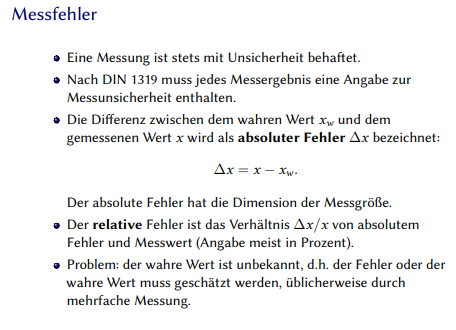
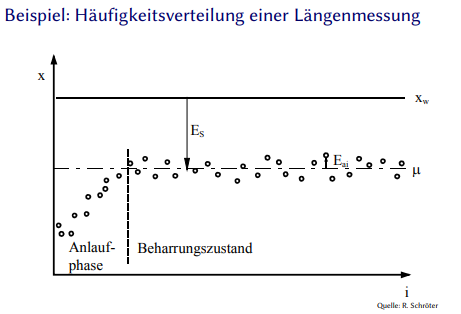
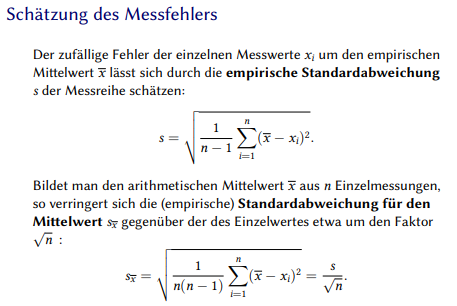
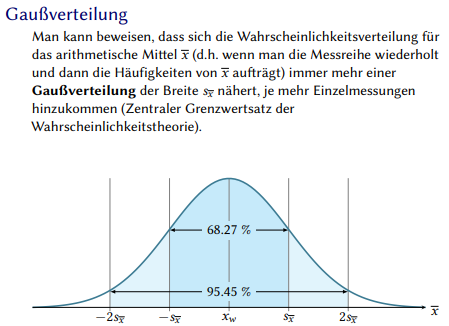
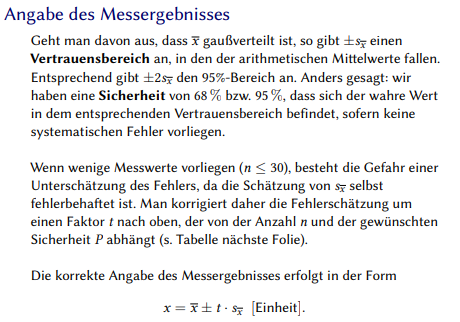
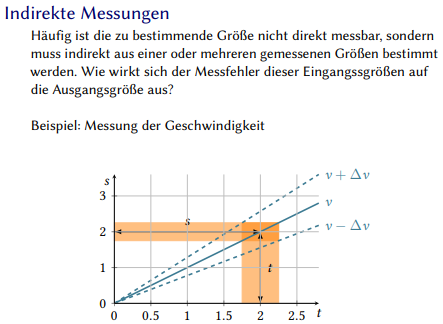
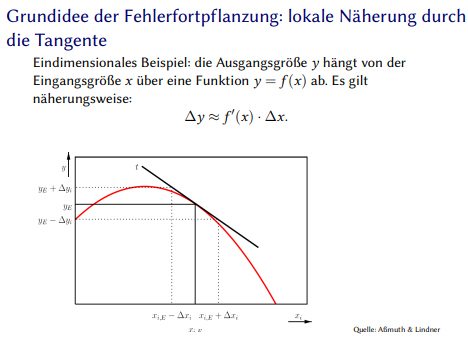
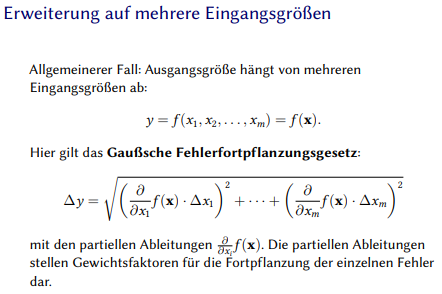
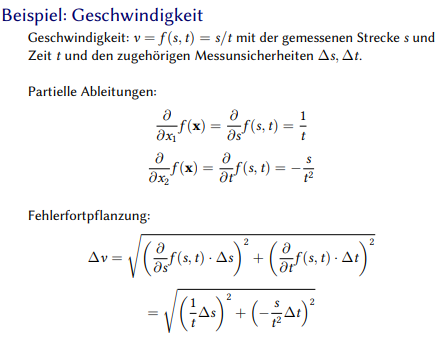
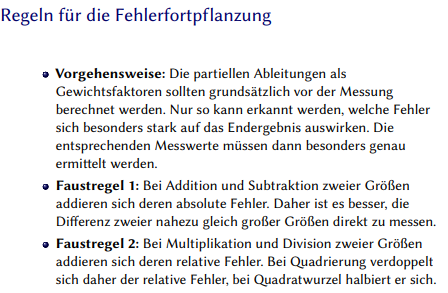

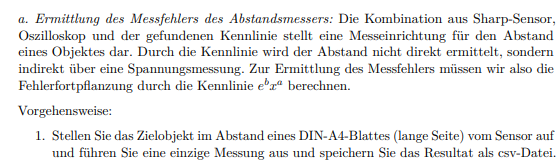


C:\Users\Nikita\Desktop\Technische Grundlagen der KI\Labor1\Versuch1_DINA4_LAENGE.csv


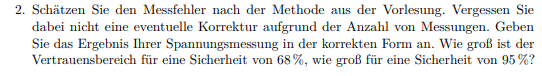

In [83]:
def messfehlerErmittlung(dateipfad):
    #Problem: der wahre Wert ist unbekannt, d.h. der Fehler oder der
    #wahre Wert muss geschätzt werden, üblicherweise durch
    #mehrfache Messung.
    #Als Schätzwert für den wahren Wert xw wird das arithmetische
    #Mittel x aus den Einzelmesswerten xi verwendet:
    x_all =[]
    y_all = []
    sumuM =0
    t, u, uM, stdu, emstd = rechne(dateipfad)
        
    for cm in range(21):          
        for z in range(len(u)):x_all.append(u[z])       # Spannung U
        y_all.append(cm)                                # Abstand cm
        sumuM = sumuM+uM
        
    arythmetischesMittel = sumuM/21
    wahresX = arythmetischesMittel
    klammersumme = 0
    n=len(x_all)
    absoluterFehlerArr=[]
    for i in range(0,n):
        gemessenX = x_all[i]
        
        absoluterFehler = gemessenX - wahresX
        absoluterFehlerArr.append(absoluterFehler)
        relativerFehler = absoluterFehler/ gemessenX # Angabe in %!
        zufälligerFehler = gemessenX-arythmetischesMittel
        systematischerFehler = arythmetischesMittel - wahresX
        
        n=cm
        klammer = (arythmetischesMittel-gemessenX)**2
        klammersumme = klammersumme+klammer
        
    empirischeStandardAbweichung=np.sqrt(klammersumme/ (n-1))
    wegenEinzelwertenVerringerteEmpirischeStandardAbweichung = empirischeStandardAbweichung/np.sqrt(n)
    # 68% == emstd, 95% == 2*emstd
    print("Vertrauensbereich:")
    print(f"68% == {wegenEinzelwertenVerringerteEmpirischeStandardAbweichung:.3f} \n"+
          f"95% == {2*wegenEinzelwertenVerringerteEmpirischeStandardAbweichung:.3f}\n")
    print(" x     = xMittel +- t · sxMittel cm\n "+
          f"{gemessenX:.3f} = {arythmetischesMittel:.3f}   +- t · {wegenEinzelwertenVerringerteEmpirischeStandardAbweichung:.3f} cm\n")
    return t,u,arythmetischesMittel, stdu, wegenEinzelwertenVerringerteEmpirischeStandardAbweichung, absoluterFehlerArr
    
fang=messfehlerErmittlung(r'C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_DINA4_LAENGE.csv')

Vertrauensbereich:
68% == 0.038 
95% == 0.077

 x     = xMittel +- t · sxMittel cm
 0.710 = 0.711   +- t · 0.038 cm



Vertrauensbereich:
68% == 0.038 
95% == 0.077

 x     = xMittel +- t · sxMittel cm
 0.710 = 0.711   +- t · 0.038 cm

plottCsv


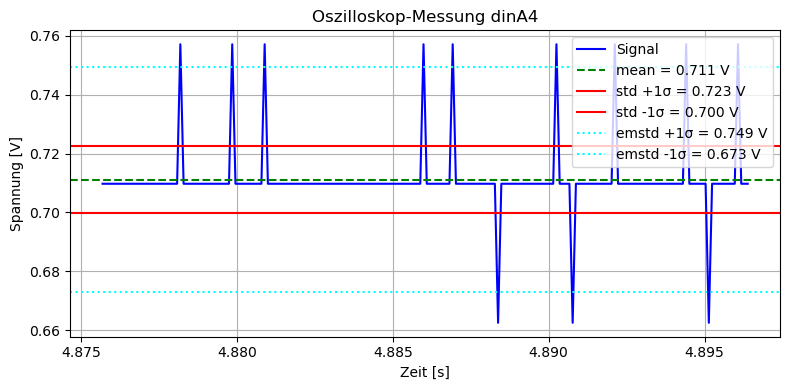

logarythmierAll


C:\Users\Nikita\AppData\Local\Temp\ipykernel_21764\3259883297.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc = "upper right")     #legende oben rechts


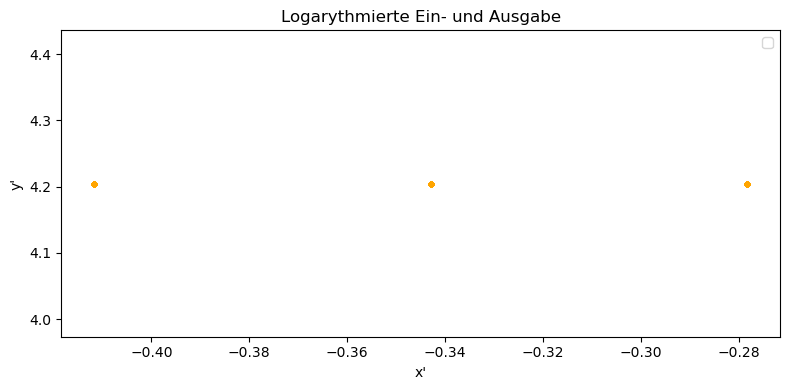

lineareRegression
a = -2.6667, b = 2.6487
Potenzfunktion: y = e^2.6487 * x^-2.6667


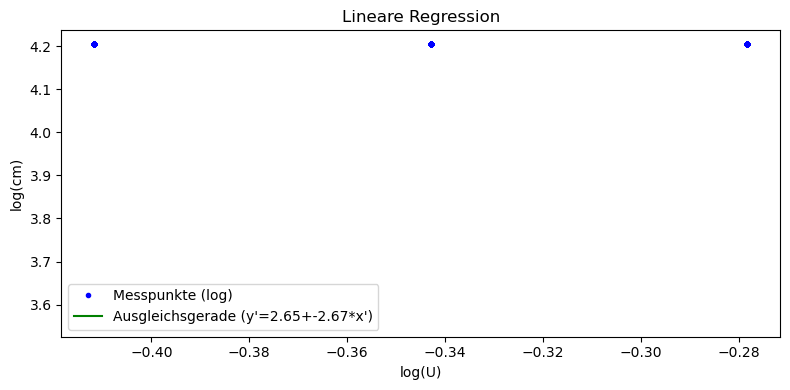

rueckrechnung
a = -2.6667, b = 2.6487
Potenzfunktion: y = e^2.6487 * x^-2.6667


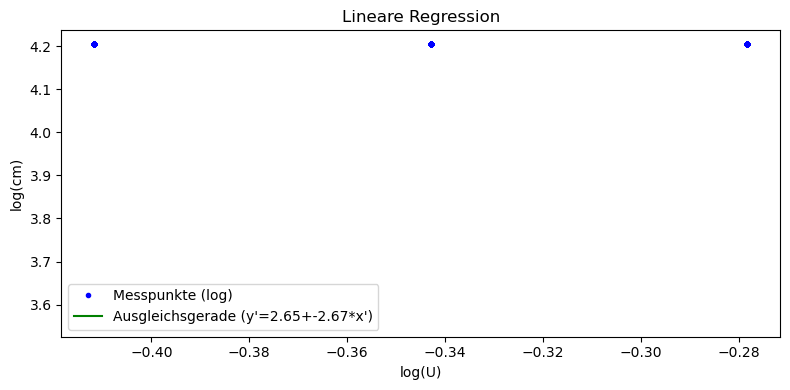

Für 0.711 Ergebnis: 35.124


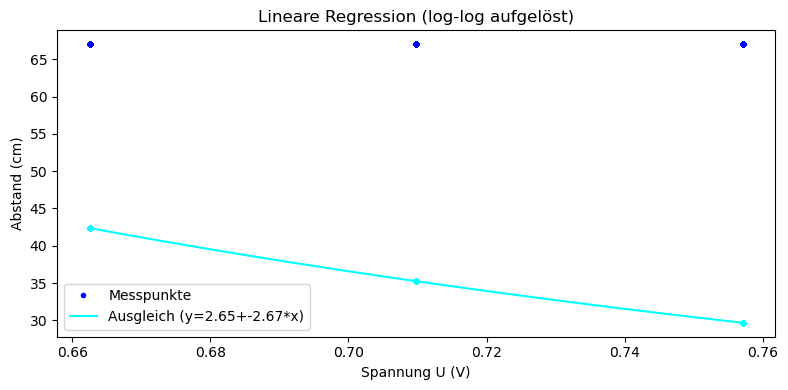

(array([35.26825277, 35.26825277, 35.26825277, ..., 35.26825277,
        35.26825277, 35.26825277]),
 array([0.70973796, 0.70973796, 0.70973796, ..., 0.70973796, 0.70973796,
        0.70973796]),
 [np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(0.04594377165000019),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.04863669834999973),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(-0.0014233183499997581),
  np.float64(0.04594377165000019),
  np.float64(-0.0014233183499997581),
  np.float64(-

In [84]:
def abstand(dateipfad):
    # Funktion gibt 5 Werte zurück
    t, u, arythmetischesMittel, stdu, wegenEinzelwertenVerringerteEmpirischeStandardAbweichung, absoluterFehler = \
        messfehlerErmittlung(dateipfad)

    # danach kannst du sie direkt verwenden
    print("plottCsv")
    plottCsv("dinA4", t, u, arythmetischesMittel, stdu, wegenEinzelwertenVerringerteEmpirischeStandardAbweichung)
    print("logarythmierAll")
    logarythmierAll(dateipfad)
    print("lineareRegression")
    b,a = lineareRegression(dateipfad)
    print("rueckrechnung")
    ergebnis, punkte=rueckrechnung(dateipfad)
    return ergebnis, punkte, absoluterFehler
# Aufruf
abstand(r'C:\\Users\\Nikita\\Desktop\\Technische Grundlagen der KI\\Labor1\\Versuch1_DINA4_LAENGE.csv')


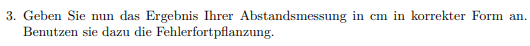

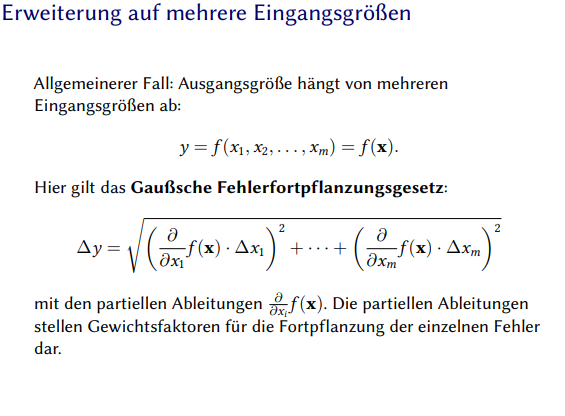
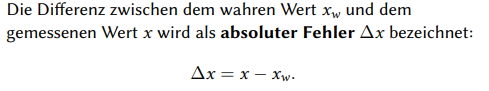
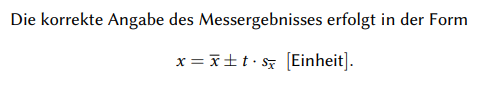

In [85]:
def fehlerFortpflanzung():
    
fehlerFortpflanzung()

IndentationError: expected an indented block after function definition on line 1 (3026140950.py, line 3)

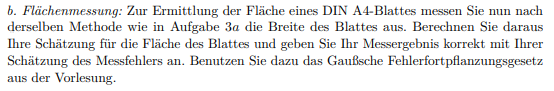

C:\Users\Nikita\Desktop\Technische Grundlagen der KI\Labor1\Versuch1_DINA4_BREITE.csv

länge, breite

dinA4 = [0.710, 0.900]